In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets

In [0]:
points, labels = sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=[(0.5, -0.5), (1, 1)], cluster_std=0.5)
points = torch.Tensor(points)
labels = torch.Tensor(labels)

In [0]:
def plot_scatter(X, Y):
  plt.plot(X.numpy(), Y.numpy(), 'o')

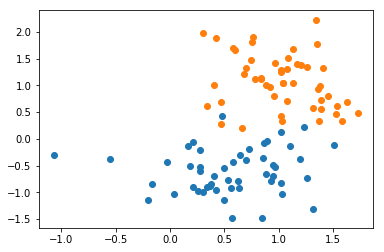

In [0]:
plot_scatter(points[labels==0, 0], points[labels==0, 1])
plot_scatter(points[labels==1, 0], points[labels==1, 1])

In [0]:
class Perceptron(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.linear = nn.Linear(in_features, out_features)
    
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

In [0]:
torch.manual_seed(313)
model = Perceptron(2, 1)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [0]:
epochs = 1000
for epoch in range(epochs):
  y = model.forward(points)
  optimizer.zero_grad()
  loss = criterion(y, labels)
  print(epoch, ": ", loss.item())
  loss.backward()
  optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


0 :  0.5257179737091064
1 :  0.5217201709747314
2 :  0.5177558660507202
3 :  0.513825535774231
4 :  0.5099298357963562
5 :  0.5060685873031616
6 :  0.5022426247596741
7 :  0.4984518885612488
8 :  0.49469658732414246
9 :  0.49097731709480286
10 :  0.4872938096523285
11 :  0.4836462438106537
12 :  0.4800347089767456
13 :  0.47645899653434753
14 :  0.47291961312294006
15 :  0.4694160223007202
16 :  0.46594852209091187
17 :  0.4625168740749359
18 :  0.45912083983421326
19 :  0.4557606875896454
20 :  0.45243602991104126
21 :  0.4491468071937561
22 :  0.4458931088447571
23 :  0.4426746368408203
24 :  0.43949127197265625
25 :  0.43634307384490967
26 :  0.4332297146320343
27 :  0.43015140295028687
28 :  0.427107572555542
29 :  0.424098402261734
30 :  0.4211238622665405
31 :  0.4181833267211914
32 :  0.4152769148349762
33 :  0.4124041795730591
34 :  0.4095652103424072
35 :  0.40675944089889526
36 :  0.4039868414402008
37 :  0.40124693512916565
38 :  0.39853954315185547
39 :  0.39586424827575684

In [0]:
[w, b] = list(model.parameters())
w1, w2 = w.view(2)
w1, w2, b = w1.item(), w2.item(), b.item()
def plot_line(a, b):
  x = np.array([min(points[:, 0] - 0.5), max(points[:, 0]) + 0.5])
  y = a * x + b
  plt.plot(x, y, 'r')

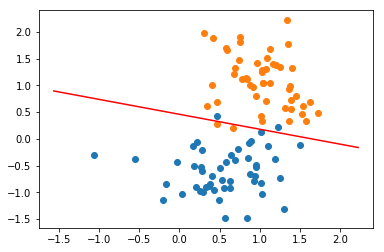

In [0]:
plot_scatter(points[labels==0, 0], points[labels==0, 1])
plot_scatter(points[labels==1, 0], points[labels==1, 1])
plot_line(w1/-w2, b/-w2)